In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
dataset1 = pd.read_csv('AirlinesCluster.csv')

### Data Understanding

In [3]:
# peeking at the dataset
dataset1.head().T

,0,1,2,3,4
Balance,28143,19244,41354,14776,97752
QualMiles,0,0,0,0,0
BonusMiles,174,215,4123,500,43300
BonusTrans,1,2,4,1,26
FlightMiles,0,0,0,0,2077
FlightTrans,0,0,0,0,4
DaysSinceEnroll,7000,6968,7034,6952,6935


- Balance = number of miles eligible for award travel
- QualMiles = number of miles qualifying for TopFlight status
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months
- FlightMiles = number of flight miles in the past 12 months
- FlightTrans = number of flight transactions in the past 12 months
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [4]:
# Summary statistics
dataset1.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


### Data Preparation - Feature Scaling Functions

- MinMaxScaler
    - Use first unless have theoretical reason to need stronger medicine.
    - Preserves the shape of the original distribution.
    - Doesn't reduce the importance of outliers. 
    - Least disruptive to the information in the original data. 
    - Default range for MinMaxScaler is 0 to 1. 

- RobustScaler
    - Use if have outliers and don't want them to have much influence. 
    - Outliers have less influence than with MinMaxScaler. 
    - Range is larger than MinMaxScaler or StandardScaler.

- StandardScaler
    - When need to transform a feature so it is close to normally distributed.
    - Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). 
    - If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 

In [5]:
#standardize the data to normal distribution
dataset1_standardized = preprocessing.scale(dataset1)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

### K Means Clustering

In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,38071.4,34.4,6731.6,7.6,179.2,0.6,2285.1
2,57778.8,54.9,8827.8,9.2,214.5,0.6,5824.9
3,114012.2,5543.3,19196.7,12.3,939.8,2.8,3872.2
4,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
5,153292.5,78.7,51298.1,21.3,481.6,1.5,4911.3


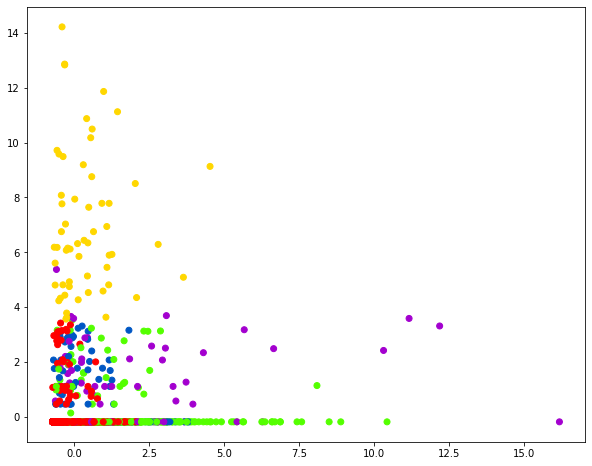

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset1_standardized.iloc[:,0], dataset1_standardized.iloc[:,1], c=y_kmeans.astype(float), cmap='prism')